##### Importe as bibliotecas pandas, matplotlib e seaborn e use a palavra mágica inline para exibir as visualizações no notebook. Carregue os dados em um DataFrame. Os dados estão disponibilizados no link: dados. Você pode carregar os dados pela URI ou salvar em sua máquina e carregá-los localmente.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
path = 'https://d11s0xq1vqg039.cloudfront.net/videos_conteudo/visual/micro05/oficina/arquivos/dadosoficina05.txt'
df_imoveis = pd.read_csv(path)
df_imoveis.head(5)

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
2,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
3,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836
4,Rio de Janeiro,72,2,1,0,7,acept,not furnished,740,1900,85,25,2750


In [3]:

df_imoveis['rent amount (R$)'].describe()

df_maior_aluguel = df_imoveis[df_imoveis['rent amount (R$)'] == df_imoveis['rent amount (R$)'].max()]
print(f'O imóvel mais caro fica em {df_maior_aluguel["city"].values}')

df_menor_aluguel = df_imoveis[df_imoveis['rent amount (R$)'] == df_imoveis['rent amount (R$)'].min()]
print(f'O imóvel mais barato fica em {df_menor_aluguel["city"].values}')


O imóvel mais caro fica em ['São Paulo']
O imóvel mais barato fica em ['Belo Horizonte']


##### Crie uma visualização que mostre a distribuição dos valores de aluguel, ‘rent amount (R$)’, dos imóveis. Pode utilizar o gráfico que você julgar mais adequado. Qual faixa de valores de aluguel é mais comum?

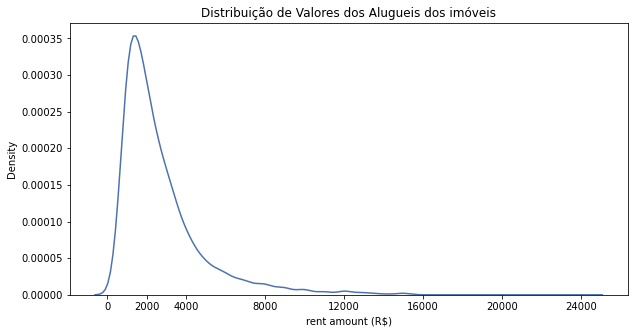

Adicionando alguns elementos adicionais na escala, podemos avaliar que a faixa mais comum de alugueis se encontra em 2.000 mil reais (oscilando de 1.500 até 2.500) 


In [15]:
# Construção do Gráfico de Distribuição de Aluguel
plt.figure(figsize=(10, 5))
plt.title('Distribuição de Valores dos Alugueis dos imóveis')
sns.kdeplot(df_imoveis['rent amount (R$)'])
plt.xticks([0,2000,4000,8000,12000,16000,20000,24000])
plt.show()

print('Adicionando alguns elementos adicionais na escala, podemos avaliar que a faixa mais comum de alugueis se encontra em 2.000 mil reais (oscilando de 1.500 até 2.500) ')

##### Crie uma visualização que mostre a distribuição dos valores de seguro contra incêndio, 'fire insurance (R$)', dos imóveis. Existem valores incomuns?

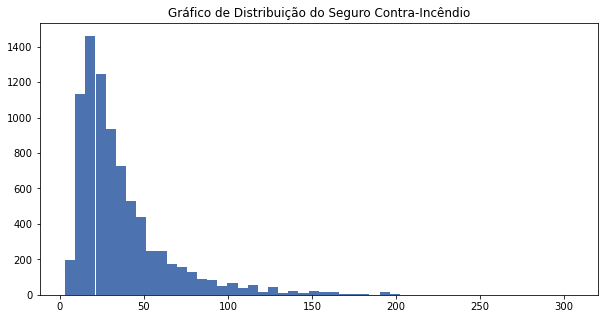

Pelo gráfico, conseguimos avaliar que a partir dos R$ 150 os valores começam a ficar menor frequentes. A partir de R$ 200, apesar da visualização a partir dessa faixa estar prejudicada


In [19]:
# Construção do Gráfico de Distribuição de Aluguel
plt.figure(figsize=(10,5))
plt.style.use('seaborn-deep')
plt.title('Gráfico de Distribuição do Seguro Contra-Incêndio')
plt.hist(df_imoveis['fire insurance (R$)'],bins=50)
plt.show()

print('Pelo gráfico, conseguimos avaliar que a partir dos R$ 150 os valores começam a ficar menor frequentes. A partir de R$ 200, apesar da visualização a partir dessa faixa estar prejudicada')

In [20]:
# Encontrando manualmente os valores acima de R$ 200 para o seguro de incêndio
df_imoveis[df_imoveis['fire insurance (R$)'] >= 200]

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
1775,Belo Horizonte,100,3,2,1,-,acept,not furnished,0,14500,423,238,15160
1990,São Paulo,80,2,1,1,1,acept,not furnished,875,24000,0,305,25180
2432,Belo Horizonte,150,5,5,5,-,acept,furnished,0,14000,835,230,15070
6608,Belo Horizonte,193,3,3,1,-,acept,not furnished,0,13500,236,222,13960
7586,Belo Horizonte,148,2,3,3,12,acept,not furnished,870,15000,685,200,16760


In [36]:
# Avaliando Outlier (mean+-[stdx2])

media = df_imoveis['fire insurance (R$)'].mean()
std = df_imoveis['fire insurance (R$)'].std()

df_negativo = df_imoveis[df_imoveis['fire insurance (R$)'] < (media-(std*2))]
df_positivo = df_imoveis[df_imoveis['fire insurance (R$)'] > (media+(std*2))]

print({len(df_negativo)},{len(df_positivo)},{len(df_imoveis)})

print('Podemos avaliar via outlier que as localizações de maior valor, logicamente, possuem o preço do fire insurance inflacionado')

{0} {410} {8204}
Podemos avaliar via outlier que as localizações de maior valor, logicamente, possuem o preço do fire insurance inflacionado
